# Customer satisfaction prediction

## Dataset structure
| n    | Variable                      | Description                                                  |
| :--- | :---------------------------- | :----------------------------------------------------------- |
| 1    | id                            | Client ID                                                    |
| 2    | Gender                        | Client Gender                                                |
| 3    | Customer type                 | Client type: Premium or Standard                             |
| 4    | Age                           | Client Age                                                   |
| 5    | Price                         | Client Age                                                   |
| 6    | New/Used                      | Client Age                                                   |
| 7    | Category                      | Client Age                                                   |
| 8    | Product description accuracy  | Level of satisfaction on product description                 |
| 9    | Manufacturer stainability     | Level of satisfaction on the manufacturing sustainability process |
| 10   | Packaging quality             | Level of satisfaction on packaging                           |
| 11   | Additional options            | Level of satisfaction on extra options                       |
| 12   | Reviews and ratings           | Level of satisfaction on reviews and rating information      |
| 13   | Integrity of packaging        | Level of satisfaction on packaging state                     |
| 14   | Check-out procedure           | Level of satisfaction on payment procedure                   |
| 15   | Relevance of related products | Level of satisfaction on related product suggestion          |
| 16   | Costumer insurance            | Level of satisfaction on insurance options                   |
| 17   | Shipping delay in days        | Delay of shipping in days                                    |
| 18   | Arrival delay in days         | Arrival delay on days                                        |
| 19   | Satisfaction                  | Target: Satisfied, Not Satisfied                             |

In [120]:
# Import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

In [121]:
df = pd.read_csv('../data/interim/model_cleaned.csv')
df.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)
df

,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
0,Female,Premium,60.000000,37.66,New,Entertainment,4,4,2,4,3,5,3,4,2,0,0,0
1,Female,Premium,57.000000,331.90,New,Technology,1,1,3,5,5,5,4,5,5,0,0,1
2,Female,Premium,38.000000,311.06,New,Technology,3,3,5,5,5,4,1,5,5,0,0,1
3,Male,Premium,43.923419,85.14,New,Technology,5,5,3,2,5,4,5,1,3,0,0,0
4,Male,Premium,37.000000,23.15,New,Entertainment,1,1,5,1,3,3,2,2,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Female,Premium,29.000000,156.42,New,Home/Kitchen,1,1,3,3,4,3,1,3,3,0,0,0
49994,Female,Premium,28.000000,20.03,New,Technology,3,3,5,1,4,4,2,4,5,0,0,0
49995,Male,Premium,28.000000,70.41,New,Home/Kitchen,5,1,4,1,1,5,4,4,4,0,0,0
49996,Male,Premium,35.000000,98.82,New,Entertainment,4,4,1,2,2,2,3,2,3,0,0,0


***
## Data exploration

In [122]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical.head()

,Gender,Customer Type,NewUsed,Category
0,Female,Premium,New,Entertainment
1,Female,Premium,New,Technology
2,Female,Premium,New,Technology
3,Male,Premium,New,Technology
4,Male,Premium,New,Entertainment


In [123]:
df_numerical=df.select_dtypes(include=[np.number])
df_numerical.head()

,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
0,60.000000,37.66,4,4,2,4,3,5,3,4,2,0,0,0
1,57.000000,331.90,1,1,3,5,5,5,4,5,5,0,0,1
2,38.000000,311.06,3,3,5,5,5,4,1,5,5,0,0,1
3,43.923419,85.14,5,5,3,2,5,4,5,1,3,0,0,0
4,37.000000,23.15,1,1,5,1,3,3,2,2,5,0,0,1


In [72]:
df_review = df_numerical.iloc[:,2:-3]
df_sat = pd.DataFrame(df_numerical['Satisfaction'])
df_review = pd.concat([df_review, df_sat], axis = 1)
df_review

,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Satisfaction
0,4,4,2,4,3,5,3,4,2,0
1,1,1,3,5,5,5,4,5,5,1
2,3,3,5,5,5,4,1,5,5,1
3,5,5,3,2,5,4,5,1,3,0
4,1,1,5,1,3,3,2,2,5,1
...,...,...,...,...,...,...,...,...,...,...
49993,1,1,3,3,4,3,1,3,3,0
49994,3,3,5,1,4,4,2,4,5,0
49995,5,1,4,1,1,5,4,4,4,0
49996,4,4,1,2,2,2,3,2,3,0


In [73]:
col = list(df_review.columns)
col.remove('Satisfaction')
df_numerical.drop(labels = col, axis = 1, inplace = True)
df_numerical

,Age,Price,Shipping delay in days,Arrival delay in days,Satisfaction
0,60.000000,37.66,0,0,0
1,57.000000,331.90,0,0,1
2,38.000000,311.06,0,0,1
3,43.923419,85.14,0,0,0
4,37.000000,23.15,0,0,1
...,...,...,...,...,...
49993,29.000000,156.42,0,0,0
49994,28.000000,20.03,0,0,0
49995,28.000000,70.41,0,0,0
49996,35.000000,98.82,0,0,0


<div class='alert alert-info'>Let's make some exploratory data analysis.</div>

In [74]:
df_numerical.describe()

,Age,Price,Shipping delay in days,Arrival delay in days,Satisfaction
count,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000
mean,41.649698,118.788721,0.110164,0.112244,0.410056
std,13.054816,99.696568,0.412401,0.415129,0.491849
min,18.000000,1.020000,0.000000,0.000000,0.000000
25%,31.000000,42.560000,0.000000,0.000000,0.000000
50%,42.000000,84.400000,0.000000,0.000000,0.000000
75%,51.000000,172.600000,0.000000,0.000000,1.000000
max,85.000000,540.630000,16.000000,16.000000,1.000000


> Mean age is 41.649698 and mean price is 118.788721 for each order.</br> It is important to notice that Shipping delays in days and arrival delays in days are very similar.

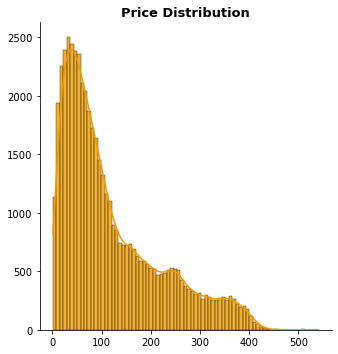

In [75]:
sns.set_palette(sns.color_palette(['#EE9B00']))
sns.displot(df_numerical, x = 'Price', kde = True, alpha = .8)
plt.savefig('../reports/figures/price_dist.png', dpi = 200)
plt.title('Price Distribution', weight='bold', size=13)
plt.xlabel('')
plt.ylabel('')
plt.show()

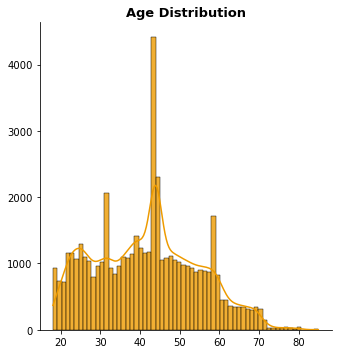

In [76]:
sns.displot(df_numerical, x = 'Age', kde = True, alpha = .8)
plt.savefig('../reports/figures/age_dist.png', dpi = 200)
plt.title('Age Distribution', weight='bold', size=13)
plt.xlabel('')
plt.ylabel('')
plt.show()

<div class='alert alert-warning'>Note that the high count of mean values are dued to NaN replacing with mean.</div>

***
#### Categorical data

In [77]:
def pct_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

[]

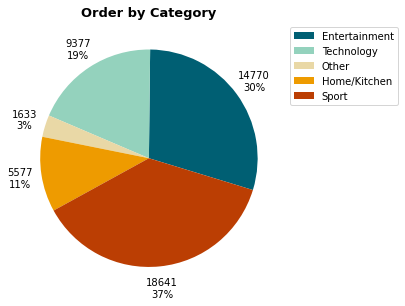

In [78]:
fig1 = plt.figure(1, figsize=(5,5))
df.groupby('Category').size().plot(kind='pie', labels = None, colors=['#005F73', '#94D2BD', '#E9D8A6', '#EE9B00', '#BB3E03'], autopct = pct_function, pctdistance=1.2, startangle=-17)
plt.legend(labels = df['Category'].unique(), bbox_to_anchor = (1,1))
plt.ylabel('')
plt.title('Order by Category', weight='bold', size=13)
plt.savefig('../reports/figures/order_by_cat.png', dpi = 200)
plt.plot()

[]

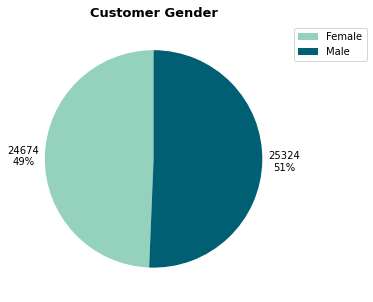

In [79]:
fig2 = plt.figure(2, figsize=(5,5))
df.groupby('Gender').size().plot(kind='pie', labels = None, colors=['#94D2BD', '#005F73'], autopct = pct_function, pctdistance=1.2, startangle=90)
plt.legend(labels = df['Gender'].unique(), bbox_to_anchor = (1,1))
plt.ylabel('')
plt.title('Customer Gender', weight='bold', size=13)
plt.savefig('../reports/figures/cust_gender.png', dpi = 200)
plt.plot()

[]

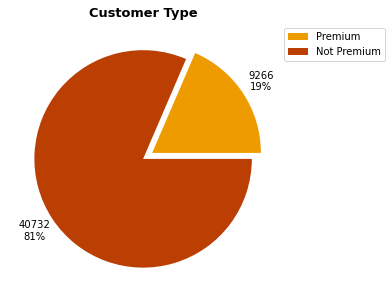

In [80]:
fig3 = plt.figure(3, figsize=(5,5))
df.groupby('Customer Type').size().plot(kind='pie', labels = None, colors=['#EE9B00', '#BB3E03'], explode = (0.1,0), autopct = pct_function, pctdistance=1.2)
plt.legend(labels = df['Customer Type'].unique(), bbox_to_anchor = (1,1))
plt.ylabel('')
plt.title('Customer Type', weight='bold', size=13)
plt.savefig('../reports/figures/cust_type.png', dpi = 200)
plt.plot()

[]

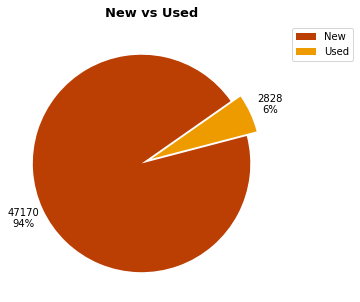

In [81]:
fig4 = plt.figure(4, figsize=(5,5))
df.groupby('NewUsed').size().plot(kind='pie', labels = None, colors=['#BB3E03', '#EE9B00'], explode = (0.1,0), autopct = pct_function, pctdistance=1.2, startangle = 35)
plt.legend(labels = df['NewUsed'].unique(), bbox_to_anchor = (1,1))
plt.ylabel('')
plt.title('New vs Used', weight='bold', size=13)
plt.savefig('../reports/figures/new_vs_used.png', dpi = 200)
plt.plot()

[]

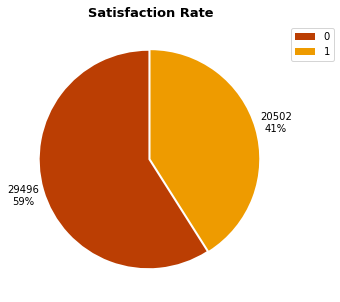

In [82]:
fig5 = plt.figure(5, figsize=(5,5))
df.groupby('Satisfaction').size().plot(kind='pie', labels = None, colors=['#BB3E03', '#EE9B00'], explode = (0.02,0), autopct = pct_function, pctdistance=1.2, startangle = 90)
plt.legend(labels = df['Satisfaction'].unique(), bbox_to_anchor = (1,1))
plt.ylabel('')
plt.title('Satisfaction Rate', weight='bold', size=13)
plt.savefig('../reports/figures/satisfaction_rate.png', dpi = 200)
plt.plot()

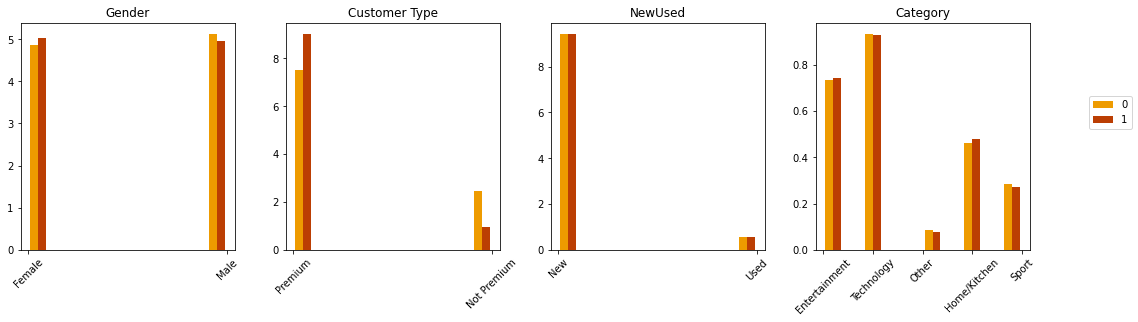

In [83]:
df_neg=df_categorical[df['Satisfaction']==0]
df_pos=df_categorical[df['Satisfaction']==1]


features = list(df_categorical.columns)

fig, axes = plt.subplots(1, 4,figsize=[15,4])

fig.tight_layout(pad=2)

for label, ax in zip(features, axes.flat):
    plt.sca(ax)
    plt.hist([df_neg[label],df_pos[label]],density=True, label=['0','1'], color=['#EE9B00','#BB3E03'])
    plt.title(label)
    plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor = (1.5,0.7))
plt.savefig('../reports/figures/cat_impact.png', dpi = 200)
plt.show()

In [84]:
from scipy.stats import chi2_contingency
chi2_check = []
for i in df_categorical.columns:
    if chi2_contingency(pd.crosstab(df['Satisfaction'], df[i]))[1] < 0.02:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [df_categorical.columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

          Column                      Hypothesis
0         Gender          Reject Null Hypothesis
1  Customer Type          Reject Null Hypothesis
2        NewUsed  Fail to Reject Null Hypothesis
3       Category  Fail to Reject Null Hypothesis


>As we can see from charts above, feature 'NewUsed' is useless in order to discriminate between satisfied customers and not satisfied customers.</br>
H0 -> the feature doesn't affect the target</br>
H1 -> the feature affect the target</br>

In [85]:
selected_features=['Gender', 'Customer Type']

In [86]:
# Create dummies for selected features
dummies = pd.get_dummies(df_categorical[selected_features], drop_first=True)
dummies.head()

,Gender_Male,Customer Type_Premium
0,0,1
1,0,1
2,0,1
3,1,1
4,1,1


In [87]:
dummies.shape

(49998, 2)

***
#### Chi Square on review data

In [88]:
df_review

,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Satisfaction
0,4,4,2,4,3,5,3,4,2,0
1,1,1,3,5,5,5,4,5,5,1
2,3,3,5,5,5,4,1,5,5,1
3,5,5,3,2,5,4,5,1,3,0
4,1,1,5,1,3,3,2,2,5,1
...,...,...,...,...,...,...,...,...,...,...
49993,1,1,3,3,4,3,1,3,3,0
49994,3,3,5,1,4,4,2,4,5,0
49995,5,1,4,1,1,5,4,4,4,0
49996,4,4,1,2,2,2,3,2,3,0


In [89]:
from scipy.stats import chi2_contingency
chi2_check = []
for i in df_review.columns:
    if chi2_contingency(pd.crosstab(df_review['Satisfaction'], df_review[i]))[1] < 0.02:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [df_categorical.columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

          Column              Hypothesis
0         Gender  Reject Null Hypothesis
1  Customer Type  Reject Null Hypothesis
2        NewUsed  Reject Null Hypothesis
3       Category  Reject Null Hypothesis
4           None  Reject Null Hypothesis
5           None  Reject Null Hypothesis
6           None  Reject Null Hypothesis
7           None  Reject Null Hypothesis
8           None  Reject Null Hypothesis
9           None  Reject Null Hypothesis


> We cannot drop any columns of review dataset.

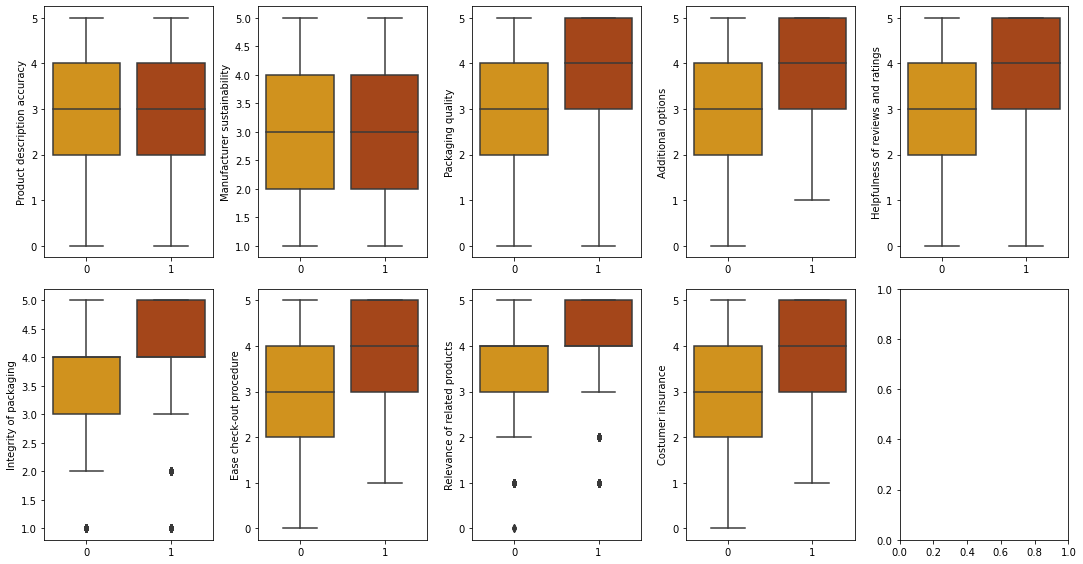

In [90]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(15,8))
fig.tight_layout()

colors = ['#EE9B00','#BB3E03']
sns.set_palette(sns.color_palette(colors))

columns = list(df_review.columns)
columns.remove('Satisfaction')

for col, ax in zip(columns, axes.flat):
    sns.boxplot( x = 'Satisfaction', y = col, data = df_review, ax = ax)
    ax.set_xlabel('')
plt.savefig('../reports/figures/reviews.png', dpi = 200)

<div class='alert alert-info'>As we could have expected, costumers' satisfaction is higher with high reviewed shopping insertions.</div>

***
#### Numerical data

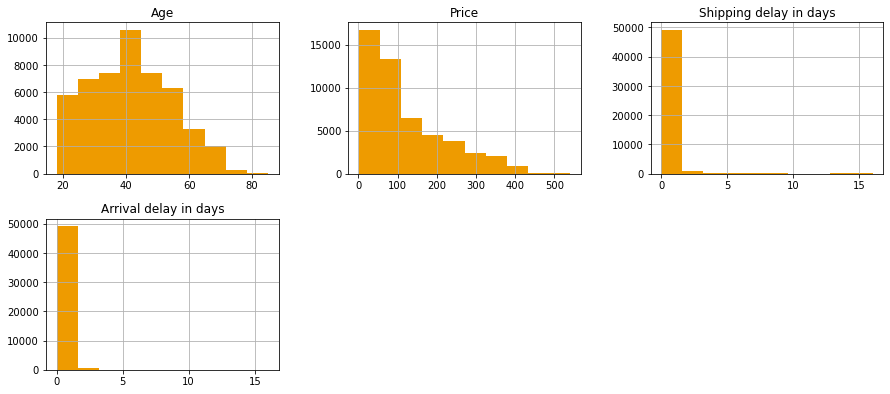

In [91]:
hist = df_numerical.iloc[:,:-1].hist(layout = (3,3), figsize = (15,10), color=['#EE9B00']);

> Let's try with log trasformation for price, shipping delay in days and arrival delay in days.

In [134]:
import math
pd.options.mode.chained_assignment = None 

df_numerical['log_price']=df_numerical['Price'].apply(lambda x: math.log(x+1))
df_numerical['log_shipping_delays']=df_numerical['Shipping delay in days'].apply(lambda x: math.log(x+1))
df_numerical['log_arrival_delays']=df_numerical['Arrival delay in days'].apply(lambda x: math.log(x+1))

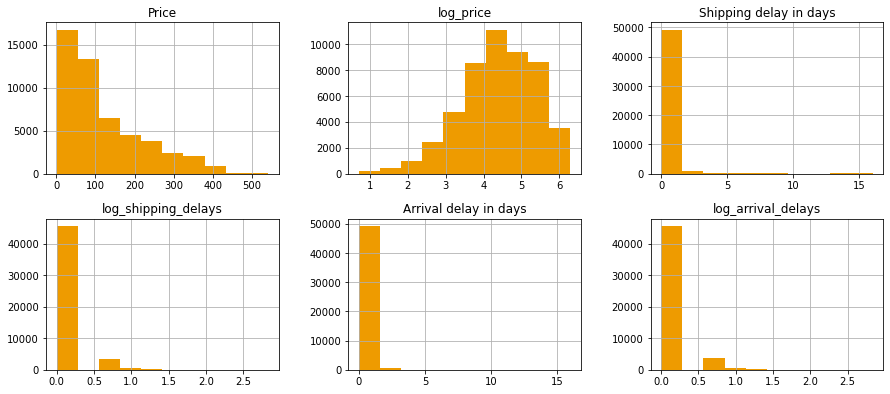

In [93]:
hist2 =df_numerical[['Price','log_price', 'Shipping delay in days','log_shipping_delays','Arrival delay in days','log_arrival_delays']].hist(layout=(3,3), figsize=(15,10), color=['#EE9B00'])

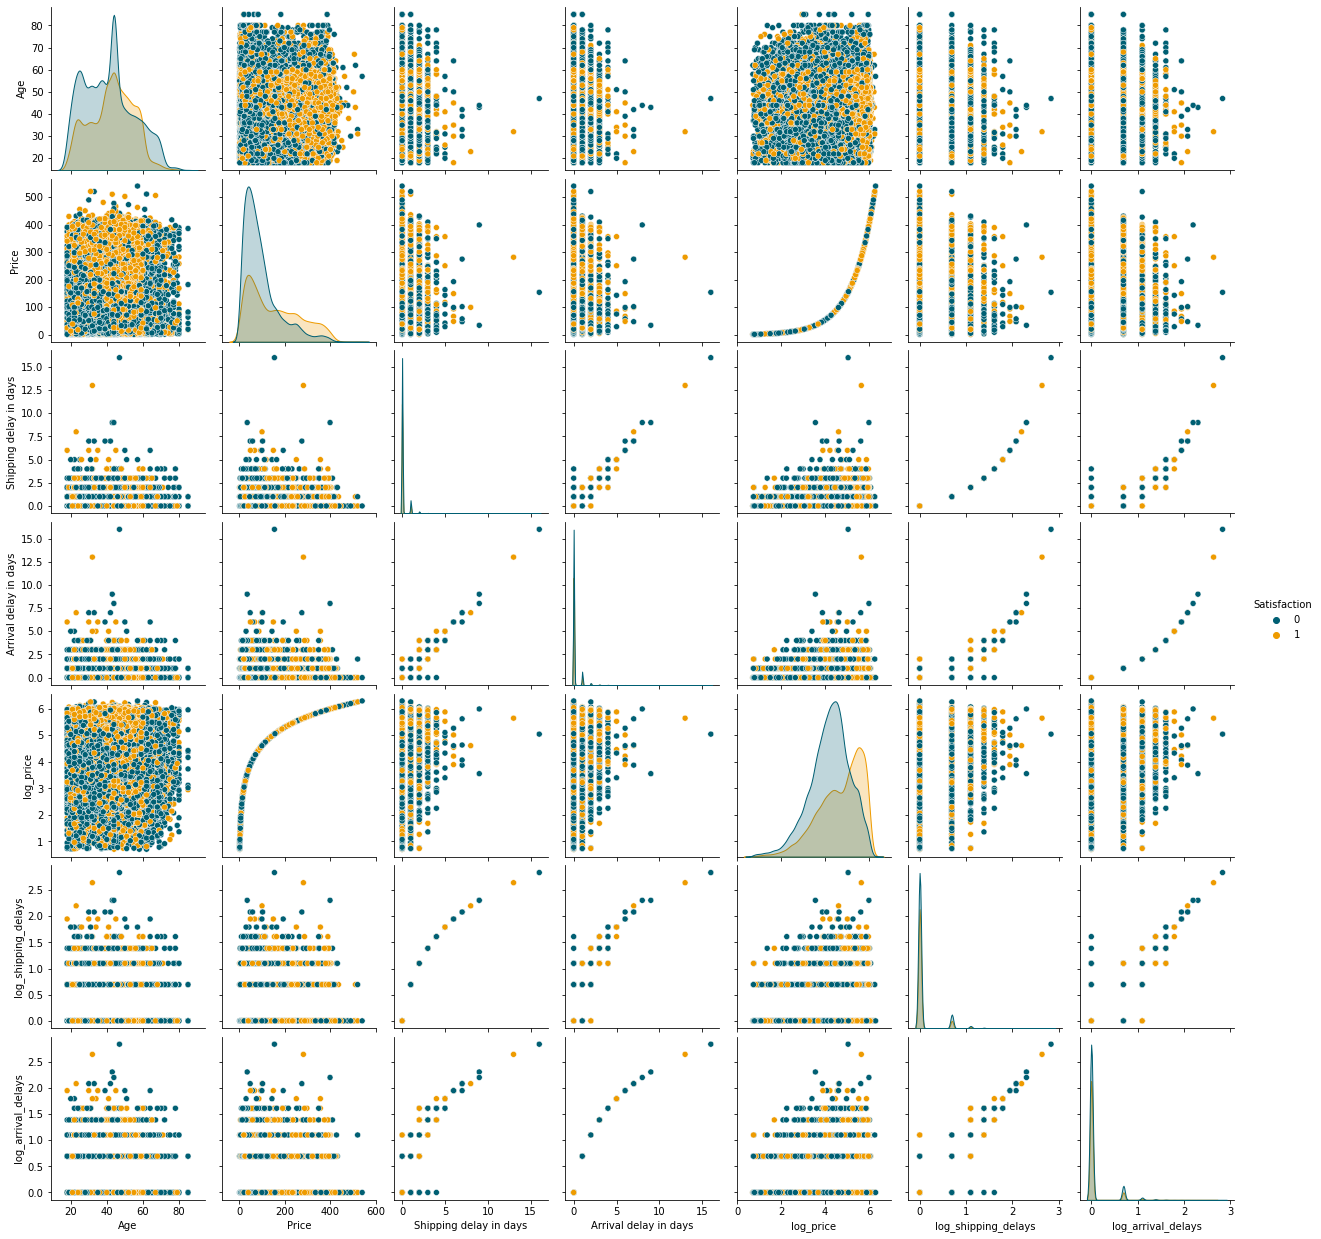

In [94]:
colors = ['#005F73', '#EE9B00']
sns.set_palette(sns.color_palette(colors))
sns.pairplot(df_numerical, hue = 'Satisfaction')
plt.show()

> log_shipping_delays and log_arrival_delays are highly correlated so we can use only log_arrival_delays.

In [135]:
selected_num = ['Age', 'log_price', 'log_arrival_delays']

In [136]:
df_numerical = df_numerical[selected_num]
df_numerical

,Age,log_price,log_arrival_delays
0,60.000000,3.654805,0.0
1,57.000000,5.807842,0.0
2,38.000000,5.743195,0.0
3,43.923419,4.455974,0.0
4,37.000000,3.184284,0.0
...,...,...,...
49993,29.000000,5.058917,0.0
49994,28.000000,3.045950,0.0
49995,28.000000,4.268438,0.0
49996,35.000000,4.603369,0.0


In [137]:
df_numerical.describe()

,Age,log_price,log_arrival_delays
count,49998.000000,49998.000000,49998.000000
mean,41.649698,4.389123,0.070078
std,13.054816,0.976562,0.233208
min,18.000000,0.703098,0.000000
25%,31.000000,3.774139,0.000000
50%,42.000000,4.447346,0.000000
75%,51.000000,5.156754,0.000000
max,85.000000,6.294583,2.833213


> There aren't features with variance<0.002, so we cannot drop other columns.

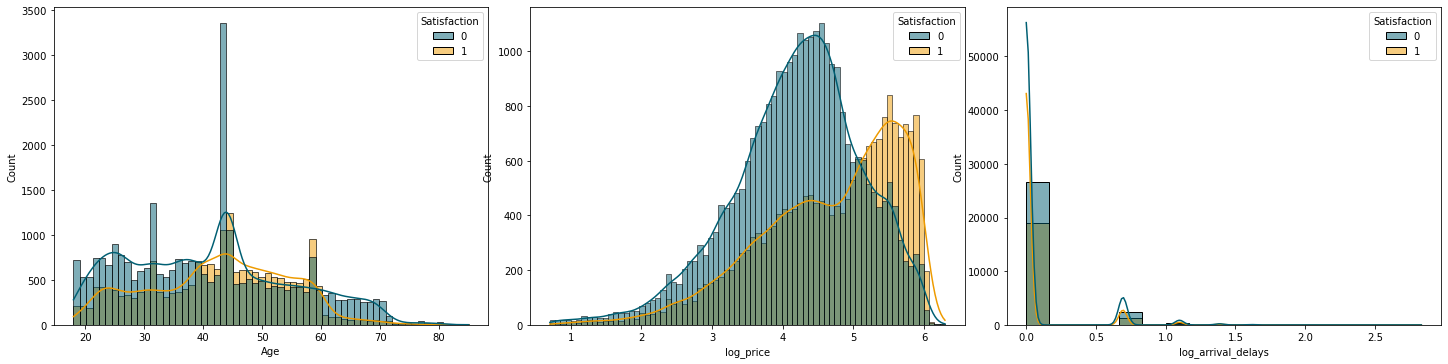

In [138]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20,5))
fig.tight_layout()

col = ['Age', 'log_price', 'log_arrival_delays']
for label, ax in zip(col, axes.flat):
   sns.histplot( x = label, data = df_numerical, hue = df_review['Satisfaction'], ax = ax, kde = True)
plt.savefig('../reports/figures/selected_num_dist.png', dpi = 200)
plt.show()

***
#### Export dataset

In [141]:
df_proc = pd.concat([df_numerical, dummies, df_review], axis = 1)
df_proc.to_csv('../data/interim/selected_features.csv')
df_proc

,Age,log_price,log_arrival_delays,Gender_Male,Customer Type_Premium,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Satisfaction
0,60.000000,3.654805,0.0,0,1,4,4,2,4,3,5,3,4,2,0
1,57.000000,5.807842,0.0,0,1,1,1,3,5,5,5,4,5,5,1
2,38.000000,5.743195,0.0,0,1,3,3,5,5,5,4,1,5,5,1
3,43.923419,4.455974,0.0,1,1,5,5,3,2,5,4,5,1,3,0
4,37.000000,3.184284,0.0,1,1,1,1,5,1,3,3,2,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,29.000000,5.058917,0.0,0,1,1,1,3,3,4,3,1,3,3,0
49994,28.000000,3.045950,0.0,0,1,3,3,5,1,4,4,2,4,5,0
49995,28.000000,4.268438,0.0,1,1,5,1,4,1,1,5,4,4,4,0
49996,35.000000,4.603369,0.0,1,1,4,4,1,2,2,2,3,2,3,0


***
#### Standardize numerical data

In [100]:
# Load selected fetures dataset
df = pd.read_csv('../data/interim/selected_features.csv', index_col=0)
df

,Age,log_price,log_arrival_delays,Gender,Customer Type,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Satisfaction
0,60.000000,3.654805,0.0,Female,Premium,New,Entertainment,4,4,2,4,3,5,3,4,2,0
1,57.000000,5.807842,0.0,Female,Premium,New,Technology,1,1,3,5,5,5,4,5,5,1
2,38.000000,5.743195,0.0,Female,Premium,New,Technology,3,3,5,5,5,4,1,5,5,1
3,43.923419,4.455974,0.0,Male,Premium,New,Technology,5,5,3,2,5,4,5,1,3,0
4,37.000000,3.184284,0.0,Male,Premium,New,Entertainment,1,1,5,1,3,3,2,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,29.000000,5.058917,0.0,Female,Premium,New,Home/Kitchen,1,1,3,3,4,3,1,3,3,0
49994,28.000000,3.045950,0.0,Female,Premium,New,Technology,3,3,5,1,4,4,2,4,5,0
49995,28.000000,4.268438,0.0,Male,Premium,New,Home/Kitchen,5,1,4,1,1,5,4,4,4,0
49996,35.000000,4.603369,0.0,Male,Premium,New,Entertainment,4,4,1,2,2,2,3,2,3,0


In [101]:
# Data standardization except for the last column (target)
df_numerical = df.iloc[:,:-1].select_dtypes(include=[np.number])
df_numerical

,Age,log_price,log_arrival_delays,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance
0,60.000000,3.654805,0.0,4,4,2,4,3,5,3,4,2
1,57.000000,5.807842,0.0,1,1,3,5,5,5,4,5,5
2,38.000000,5.743195,0.0,3,3,5,5,5,4,1,5,5
3,43.923419,4.455974,0.0,5,5,3,2,5,4,5,1,3
4,37.000000,3.184284,0.0,1,1,5,1,3,3,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,29.000000,5.058917,0.0,1,1,3,3,4,3,1,3,3
49994,28.000000,3.045950,0.0,3,3,5,1,4,4,2,4,5
49995,28.000000,4.268438,0.0,5,1,4,1,1,5,4,4,4
49996,35.000000,4.603369,0.0,4,4,1,2,2,2,3,2,3


In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_numerical)

StandardScaler()

In [103]:
# Save the scaler
import joblib
scaler_filename = "../models/standard_scaler.save"
joblib.dump(scaler, scaler_filename) 

['../models/standard_scaler.save']

In [104]:
df_scaled_num = pd.DataFrame(scaler.transform(df_numerical))
df_scaled_num.columns = df_numerical.columns

In [105]:
df_scaled_num

,Age,log_price,log_arrival_delays,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance
0,1.405649,-0.751949,-0.300497,0.614744,0.800259,-0.892967,0.491482,-0.254859,1.167078,-0.237306,0.312907,-0.966085
1,1.175846,1.452783,-0.300497,-1.349759,-1.548560,-0.142831,1.267076,1.264359,1.167078,0.552208,1.163719,1.314047
2,-0.279570,1.386584,-0.300497,-0.040091,0.017319,1.357439,1.267076,1.264359,0.320544,-1.816332,1.163719,1.314047
3,0.174169,0.068456,-0.300497,1.269578,1.583199,-0.142831,-1.059705,1.264359,0.320544,1.341721,-2.239529,-0.206041
4,-0.356171,-1.233767,-0.300497,-1.349759,-1.548560,1.357439,-1.835298,-0.254859,-0.525989,-1.026819,-1.388717,1.314047
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,-0.968978,0.685876,-0.300497,-1.349759,-1.548560,-0.142831,-0.284111,0.504750,-0.525989,-1.816332,-0.537905,-0.206041
49994,-1.045578,-1.375423,-0.300497,-0.040091,0.017319,1.357439,-1.835298,0.504750,0.320544,-1.026819,0.312907,1.314047
49995,-1.045578,-0.123583,-0.300497,1.269578,-1.548560,0.607304,-1.835298,-1.774077,1.167078,0.552208,0.312907,0.554003
49996,-0.509373,0.219390,-0.300497,0.614744,0.800259,-1.643102,-1.059705,-1.014468,-1.372523,-0.237306,-1.388717,-0.206041


In [115]:
df_processed = pd.concat([df_scaled_num, dummies, df['Satisfaction']], axis = 1)
df_processed.to_csv('../data/processed/final.csv')

In [116]:
df_processed

,Age,log_price,log_arrival_delays,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Gender_Male,Customer Type_Premium,Satisfaction
0,1.405649,-0.751949,-0.300497,0.614744,0.800259,-0.892967,0.491482,-0.254859,1.167078,-0.237306,0.312907,-0.966085,0,1,0
1,1.175846,1.452783,-0.300497,-1.349759,-1.548560,-0.142831,1.267076,1.264359,1.167078,0.552208,1.163719,1.314047,0,1,1
2,-0.279570,1.386584,-0.300497,-0.040091,0.017319,1.357439,1.267076,1.264359,0.320544,-1.816332,1.163719,1.314047,0,1,1
3,0.174169,0.068456,-0.300497,1.269578,1.583199,-0.142831,-1.059705,1.264359,0.320544,1.341721,-2.239529,-0.206041,1,1,0
4,-0.356171,-1.233767,-0.300497,-1.349759,-1.548560,1.357439,-1.835298,-0.254859,-0.525989,-1.026819,-1.388717,1.314047,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,-0.968978,0.685876,-0.300497,-1.349759,-1.548560,-0.142831,-0.284111,0.504750,-0.525989,-1.816332,-0.537905,-0.206041,0,1,0
49994,-1.045578,-1.375423,-0.300497,-0.040091,0.017319,1.357439,-1.835298,0.504750,0.320544,-1.026819,0.312907,1.314047,0,1,0
49995,-1.045578,-0.123583,-0.300497,1.269578,-1.548560,0.607304,-1.835298,-1.774077,1.167078,0.552208,0.312907,0.554003,1,1,0
49996,-0.509373,0.219390,-0.300497,0.614744,0.800259,-1.643102,-1.059705,-1.014468,-1.372523,-0.237306,-1.388717,-0.206041,1,1,0


<div class='alert alert-success'>Succesfully saved processed data, ready to train models.</div>

>**Note:** maybe PCA for ordinal features to make some features reduction?

***
#### Downsampling

In [110]:
# Look if data are unbalanced
df_processed = pd.read_csv('../data/processed/final.csv')
df_processed.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)
df_processed['Satisfaction'].value_counts()

0    29496
1    20502
Name: Satisfaction, dtype: int64

>There are 8994 more 0 than 1.

In [111]:
from sklearn.utils import resample

df_majority = df_processed[df_processed.Satisfaction==0] 
df_minority = df_processed[df_processed.Satisfaction==1]
 
df_majority_downsampled = resample(df_majority, 
                                   replace=False, 
                                   n_samples=20502,     
                                   random_state=42)  
 
df_majority_downsampled.shape

(20502, 15)

In [112]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
df_downsampled.Satisfaction.value_counts() #"target" is the name of the target column, change it accordingly to your dataset

0    20502
1    20502
Name: Satisfaction, dtype: int64

In [142]:
df_downsampled.to_csv('../data/processed/final_down.csv')

In [143]:
df_downsampled.shape

(41004, 15)

<div class='alert alert-success'>Succesfully saved processed data, ready to train models.</div>